In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loader.data_loader import PlainDataLoader

In [ ]:
from itertools import groupby

def extract_chinese_segments(text, is_chinese_func):

    segments = []
    for k, g in groupby(text, key=is_chinese_func):
        if k:
            segments.append("".join(g))

    return segments

In [3]:
def is_chinese_char(char):
    if len(char) != 1:
        return False
        
    cp = ord(char)
    if 0x4E00 <= cp <= 0x9FFF:
        return True
        
    return False

In [4]:
obj = PlainDataLoader()

In [5]:
obj.datasets.keys()

dict_keys(['wudai-huajianji', 'wudai-nantang', 'yuanqu', 'tangsong', 'mengzi', 'songci', 'youmengying', 'yudingquantangshi', 'caocao', 'chuci', 'shuimotangshi', 'nalanxingde', 'lunyu', 'shijing'])

In [6]:
len(obj.body_extractor(list(obj.datasets.keys())[3]))

1369182

In [7]:
obj.datasets[list(obj.datasets.keys())[0]]

{'name': '五代-花间集',
 'id': 0,
 'path': '五代诗词/huajianji/',
 'excludes': ['README.md'],
 'tag': 'paragraphs'}

In [8]:
something = obj.body_extractor("wudai-huajianji")

In [9]:
len(something)

1713

In [10]:
max_chars = 0
max_poem_type = ""

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
word_counts = {}

In [13]:
obj.datasets.keys()

dict_keys(['wudai-huajianji', 'wudai-nantang', 'yuanqu', 'tangsong', 'mengzi', 'songci', 'youmengying', 'yudingquantangshi', 'caocao', 'chuci', 'shuimotangshi', 'nalanxingde', 'lunyu', 'shijing'])

In [14]:
data = obj.body_extractor(list(obj.datasets.keys())[3])

In [15]:
data[0]

'欲出未出光辣達，千山萬山如火發。'

In [16]:
for line in data:
    segments = extract_chinese_segments(line, is_chinese_char)
    for segment in segments:
        if segment in word_counts:
            word_counts[segment] += 1
        else:
            word_counts[segment] = 1

In [17]:
sorted_counts = sorted(word_counts.values(), reverse=True)
rank = np.arange(1, len(sorted_counts) + 1)
frequency = np.array(sorted_counts)

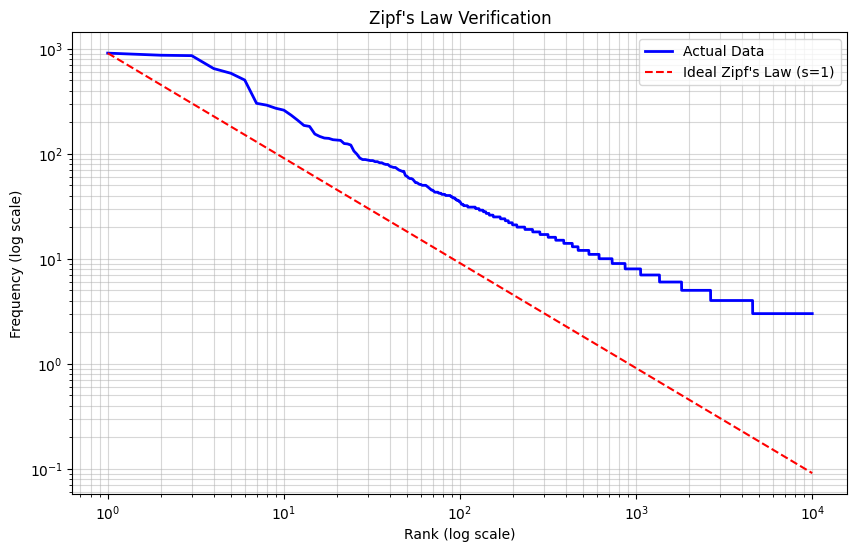

In [18]:
k = 10000
ideal_zipf = frequency[0] / rank
plt.figure(figsize=(10, 6))
plt.loglog(rank[:k], frequency[:k], 'b-', linewidth=2, label='Actual Data')
plt.loglog(rank[:k], ideal_zipf[:k], 'r--', linewidth=1.5, label="Ideal Zipf's Law (s=1)")

plt.grid(True, which="both", ls="-", alpha=0.5)
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title("Zipf's Law Verification")
plt.legend()
plt.show()